## 2. Data Visualisation

### Step 1: Analyse Correlations

After we extract our data, we can now visualise and analyse our data. Since all our data is time series data, we focus on looking at time series graphs and analysing the correlations between our data via correlation matrices and heatmaps.

In [ ]:
# Importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sb
import pandas as pd
from datetime import datetime
from functools import reduce

In [ ]:
# Import cleaned datasets
bie_data = pd.read_csv("cleaned_bie.csv")
bitcoin_data = pd.read_csv("cleaned_bitcoin.csv")
co2_data = pd.read_csv("cleaned_co2.csv")
cpi_data = pd.read_csv("cleaned_cpi.csv")
lagged_cpi_data = pd.read_csv("cleaned_lagged_cpi.csv")
neer_data = pd.read_csv("cleaned_neer.csv")
oil_data = pd.read_csv("cleaned_oil.csv")
ppi_data = pd.read_csv("cleaned_ppi.csv")
sp_data = pd.read_csv("cleaned_sp.csv")
unemp_data = pd.read_csv("cleaned_unemp.csv")

# Store in dataset_list
dataset_list = {
                'BIE': bie_data,
                'Bitcoin': bitcoin_data,
                'CO2': co2_data,
                'LaggedCPI': lagged_cpi_data,
                'NEER': neer_data,
                'Oil': oil_data,
                'PPI': ppi_data,
                'S&P500': sp_data,
                'Unemp': unemp_data
            }

# Inner join each dataset to the CPI dataset for comparison
df_list = {k:pd.merge(v, cpi_data, how='inner', on='Date') for (k,v) in dataset_list.items()}

After we have imported all our data, we can now find the correlations between each dataset against the CPI dataset for as long as the date ranges are available for that dataset (e.g. since 1948 for unemployment levels, or since 2014 for Bitcoin prices).

In [ ]:
# Calculate correlations between different variables to CPI
corr_list = {
            k:v[['Value_x', 'Value_y']].corr().iat[0,1] # [0,1] is the location on the correlation matrix that has the correlation of Value_x to Value_y
            for (k,v)
            in df_list.items()
        }

# Print correlations of each dataset to CPI
for k,v in corr_list.items():
    print(f'Correlation between {k} and CPI: \t{round(v,2)}')

Correlation between BIE and CPI: 	0.16
Correlation between Bitcoin and CPI: 	0.86
Correlation between CO2 and CPI: 	0.99
Correlation between LaggedCPI and CPI: 	1.0
Correlation between NEER and CPI: 	0.32
Correlation between Oil and CPI: 	0.72
Correlation between PPI and CPI: 	0.99
Correlation between S&P500 and CPI: 	0.87
Correlation between Unemp and CPI: 	0.2


#### Conclusion from Analysing Correlations

As expected, lagged CPI, PPI have a high correlations of 1.0 and 0.99 to CPI.

However, we do have some interesting findings as well. THe S&P500 has a 0.87 correlation to CPI, despite stocks usually performing worse in times of high inflation. As for our "cool factors", CO2 has an extremely high correlation to CPI of 0.99, while Bitcoin has a relatively high correlation of 0.86. As for BIE, NEER, oil prices and unemployment, while these are seen to be factors traditionally studied in finance against inflation, they surprisingly have lower correlations of 0.16, 0.32, 0.72, and 0.2 against CPI respectively.

From a prelimary look at correlations, we can see that perhaps our "cool factors" could prove to be better indicators of inflation than the factors studied in traditional finance.

### Step 2: Multi-Variate Pairplot & Heatmap

After looking at bi-variate correlations between each of the datasets and CPI, let us now plot a multi-variate pairplot and heatmap of the correlations between all the datasets against each other.

It was useful for us to study the individual correlations above as we could calculate the correlations for as long as the dataset was available (e.g. since 1948 for unemployment levels), but for this multi-variate analysis, we will be limited to the shortest spanning dataset (i.e. since 2014 for Bitcoin prices). Nevertheless, the pairplot and heatmap should still be a good source of visualisation for us.

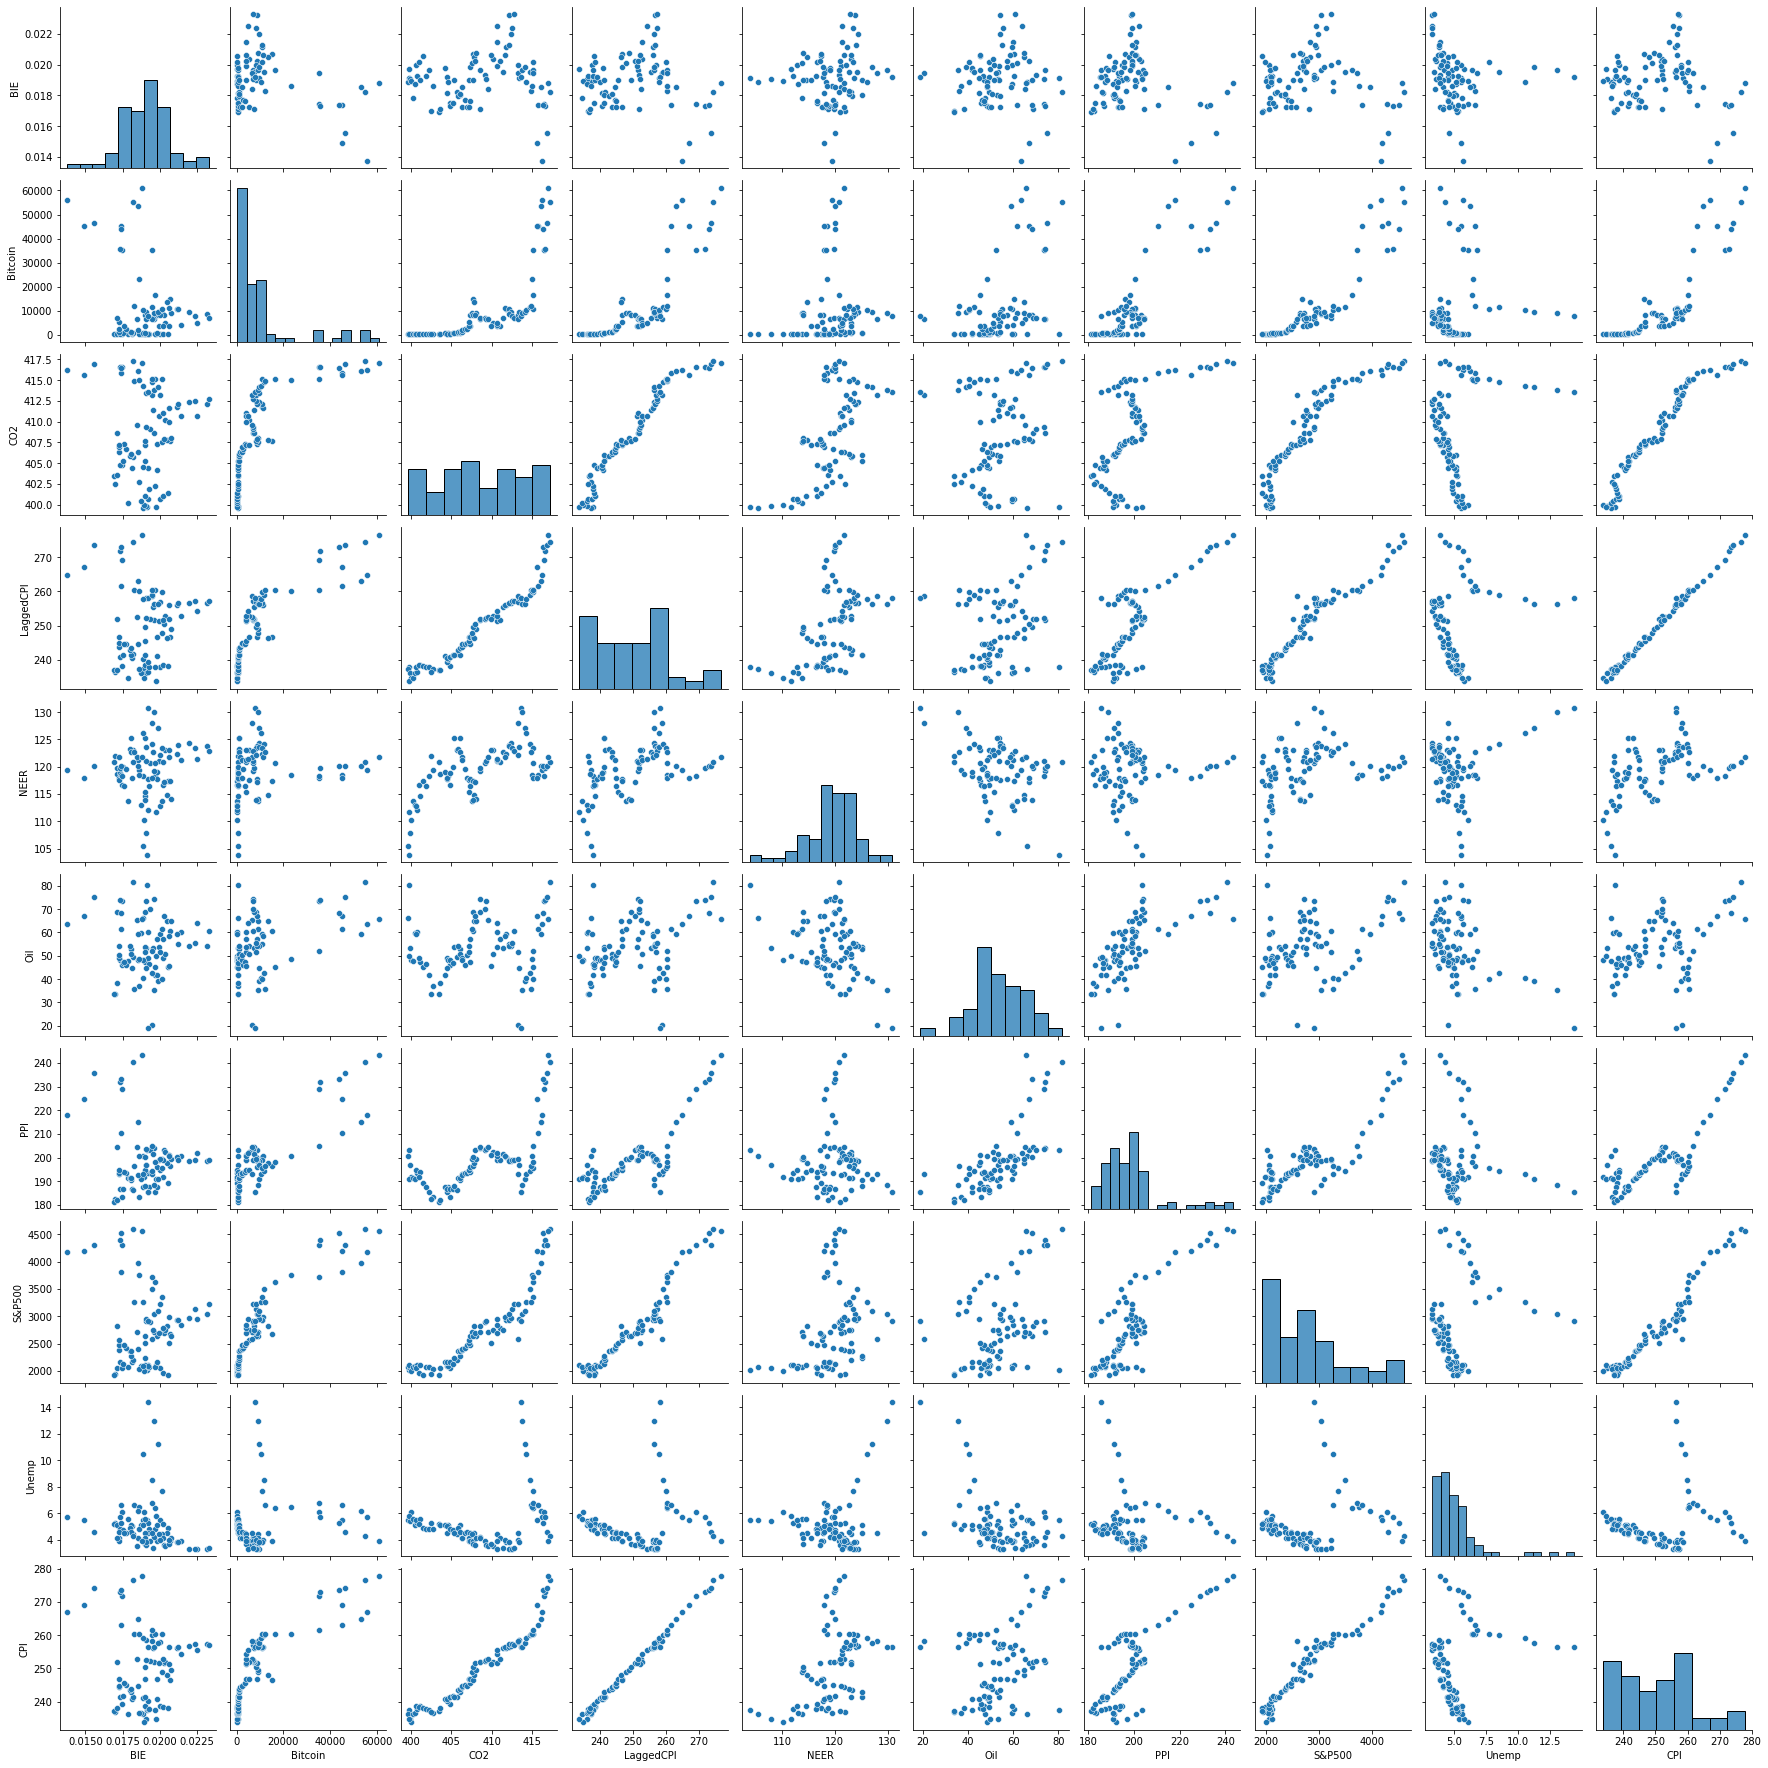

In [ ]:
# Merge the values and plot a pairplot
dataset_list_values = {k:v[['Date', 'Value']] for (k,v) in dataset_list.items()}
dataset_list_values['CPI'] = cpi_data[['Date', 'Value']]
merged_values = reduce(lambda left,right: pd.merge(left,right,on='Date', how='inner'), dataset_list_values.values())
merged_values.columns = ['Date'] + list(dataset_list.keys()) + ['CPI']
sb.pairplot(data = merged_values)

<AxesSubplot:>

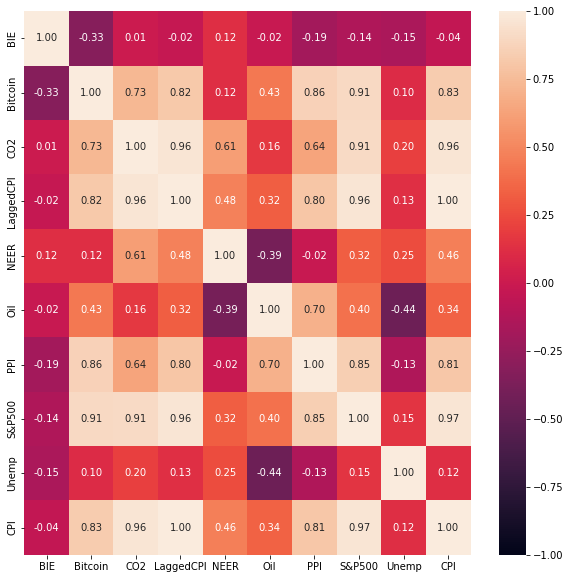

In [ ]:
# Plot a correlation matrix heatmap
f = plt.figure(figsize=(10, 10))
sb.heatmap(merged_values.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

#### Conclusion from Analysing Our Multi-Variate Pairplot & Heatmap

From our pairplot and heatmap, we can see that Bitcoin, CO2, LaggedCPI, PPI, and S&P500 still maintain a high correlation to CPI, while NEER, unemployment, oil prices, and BIE all have low correlations. However, the numbers seem to be a bit less accurate (e.g. lower PPI to CPI correlation even though theoretically we know these numbers should be very much in line) than when using the full date range available (because we are now restricted by Bitcoin's short date range when using our inner join).

Interestingly, we can also see that S&P500 and Bitcoin have a high correlation of 0.91, S&P500 and CO2 have a high correlation of 0.91, Bitcoin and PPI has a high correlation of 0.86, while LaggedCPI has a similar correlation to all variables as CPI. And lastly, unemployment and oil prices has the highest negative correlation of -0.44. While these findings might not be directly influential towards the findings of our projects, they still provide interesting insights to our study.

#### Discussion: Why do we NOT use boxplot, violin plot, histogram, KDE, etc. for our above data visualisation?
In the CZ1115 labs, the Pokemon dataset contains non-sequential data, which can be better analysed using the aforementioned types of charts to study both the distribution of different attributes of the Pokemons individually or in bi-variate or multi-variate analysis against the distributions of other attributes. Since we focus on time series data for our Mini-Project, we decided to stick to correlation matrices, pairplots, and heatmaps as these are the most relevant when analysing how absolute values change over time.

Below, we will next be analysing monthly and yearly percentage changes. For these, we can now use boxplots, etc. to analyse the distribution of percentage changes in both uni-variate and multi-variate ways.

### Step 3: Analysing Monthly Percentage Changes

We have so far compared CPI as an absolute value to the other variables. However, inflation is usually looked at from a percentage change point of view. For example, we usually hear on the news "inflation is 3% this year over last year". As people are usually more concerned about the percentage changes as compared to the absolute value of CPI, we set out to analyse if we could pull any conclusions from the percentage changes instead.

#### Step 3.1: Analysing Correlations between the Monthly Percentage Changes

As per the absolute values, we can approach analysing the monthly percentage changes by looking at the correlations.

In [ ]:
# Calculate correlations of monthly percentage changes between different variables to CPI
monthly_change_corr_list = {
            k:v[['ChangePercentMonth_x', 'ChangePercentMonth_y']].corr().iat[0,1]
            for (k,v)
            in df_list.items()
        }

# Print correlations of the monthly percentage changes of each dataset to CPI
for k,v in monthly_change_corr_list.items():
    print(f'Correlation between {k} and CPI: \t{round(v,2)}')

Correlation between BIE and CPI: 	0.05
Correlation between Bitcoin and CPI: 	-0.02
Correlation between CO2 and CPI: 	0.01
Correlation between LaggedCPI and CPI: 	0.47
Correlation between NEER and CPI: 	-0.25
Correlation between Oil and CPI: 	0.25
Correlation between PPI and CPI: 	0.66
Correlation between S&P500 and CPI: 	-0.08
Correlation between Unemp and CPI: 	-0.09


#### Conclusion from Analysing Correlations between Monthly Percentage Changes

We can now see a very different result from purely analysing the monthly percentage changes. PPI and CPI, as per theory, has the highest correlation. LaggedCPI and CPI has the 2nd highest correlation. NEER and CPI also has the tied 2nd highest correlation by magnitude. Oil and CPI has the 4th highest correlation, which goes according to financial theory as crude oil directly affects the cost of almost all of our goods and services, and hence CPI.

Interestingly, bitcoin prices, CO2, and S&P500 seem to be totally uncorrelated on a monthly percentage change basis to CPI, despite having such high correlations for their absolute values.

#### Step 3.2: Analysing Distributions between the Monthly Percentage Changes

Let's now look at the distributions to better understand the monthly percentage changes.

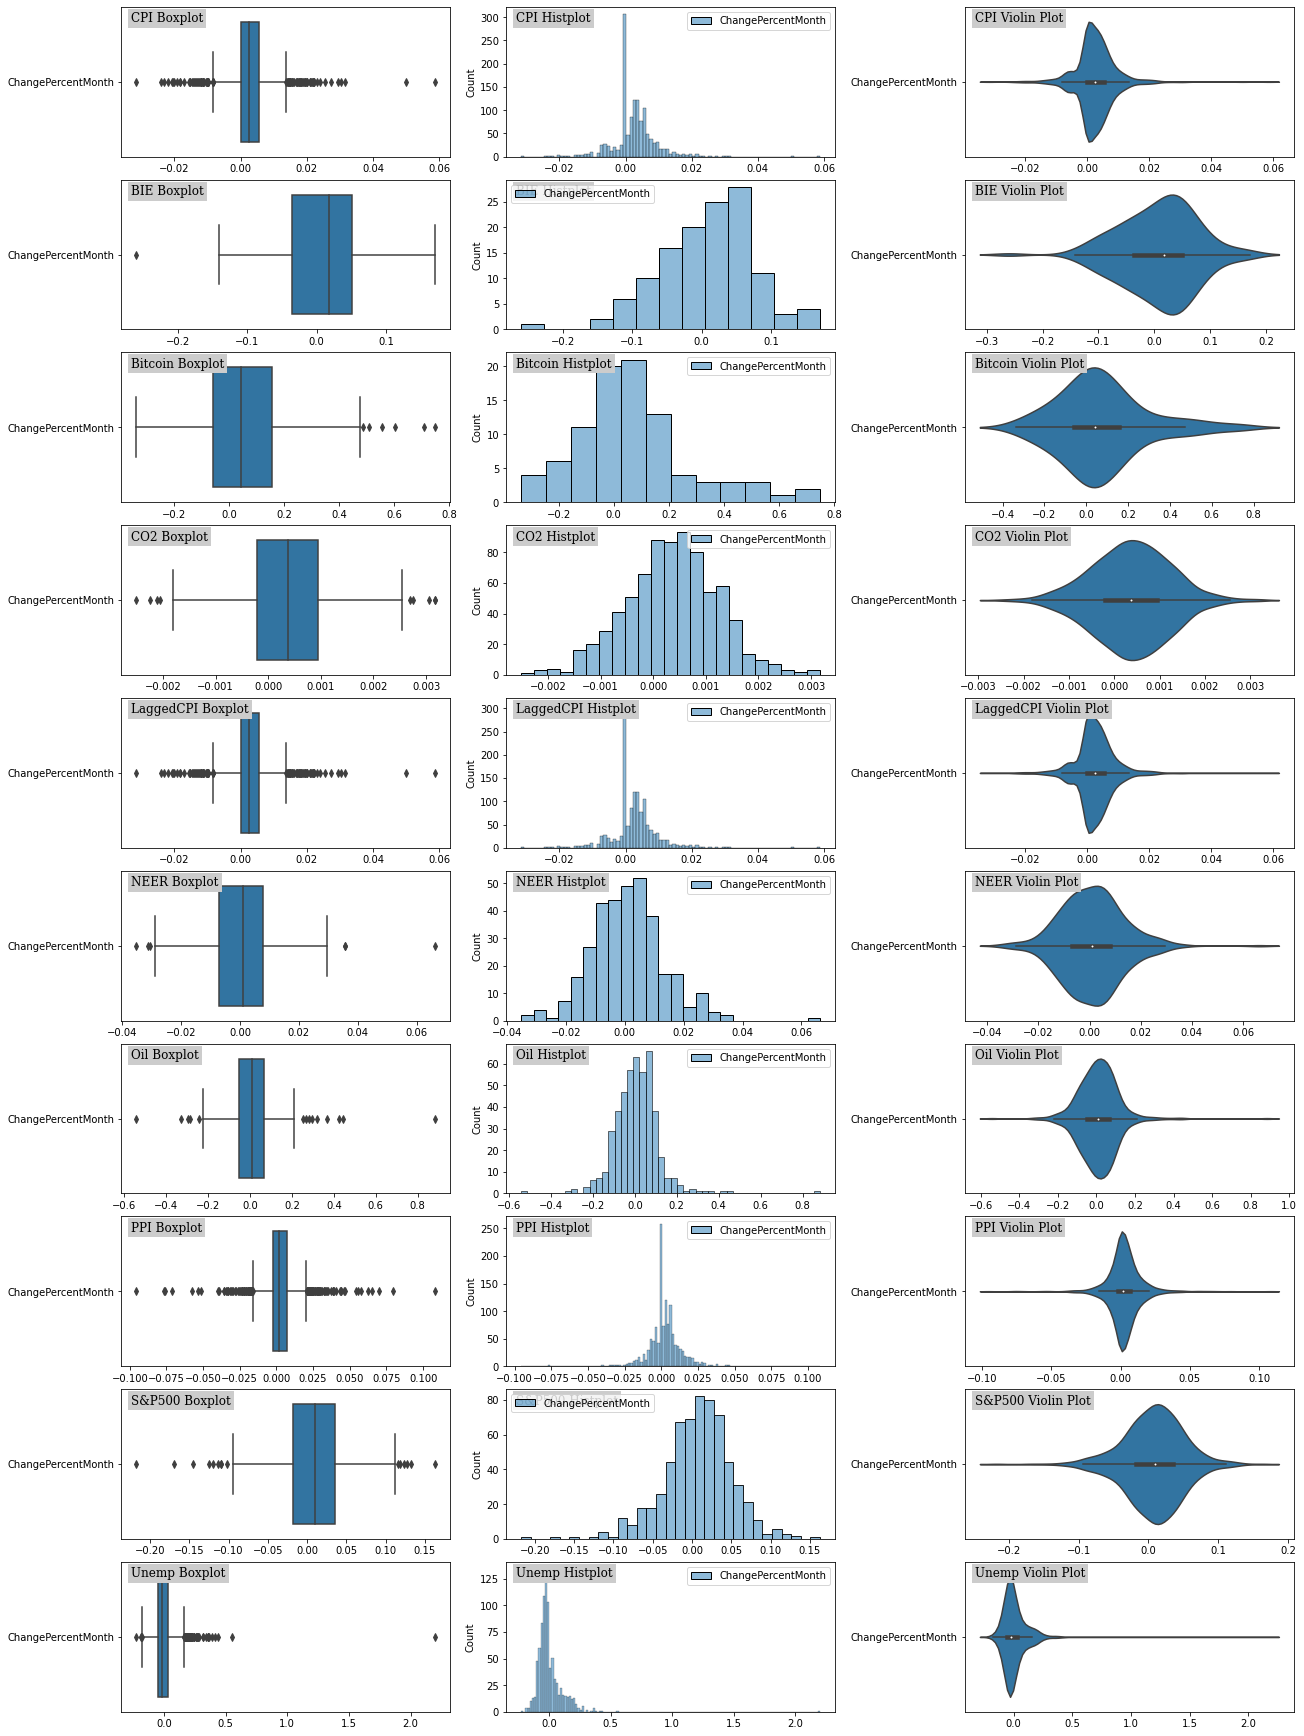

In [ ]:
# Draw the distributions of all variables in a subplot mosaic
f, axes = plt.subplot_mosaic([
                                ['CPI Boxplot', 'CPI Histplot', 'CPI Violin Plot'],
                                ['BIE Boxplot', 'BIE Histplot', 'BIE Violin Plot'],
                                ['Bitcoin Boxplot', 'Bitcoin Histplot', 'Bitcoin Violin Plot'],
                                ['CO2 Boxplot', 'CO2 Histplot', 'CO2 Violin Plot'],
                                ['LaggedCPI Boxplot', 'LaggedCPI Histplot', 'LaggedCPI Violin Plot'],
                                ['NEER Boxplot', 'NEER Histplot', 'NEER Violin Plot'],
                                ['Oil Boxplot', 'Oil Histplot', 'Oil Violin Plot'],
                                ['PPI Boxplot', 'PPI Histplot', 'PPI Violin Plot'],
                                ['S&P500 Boxplot', 'S&P500 Histplot', 'S&P500 Violin Plot'],
                                ['Unemp Boxplot', 'Unemp Histplot', 'Unemp Violin Plot']
                            ],
                            constrained_layout=True, figsize=(18,24))

# Label the subplots
for label, ax in axes.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, f.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.8', edgecolor='none', pad=3.0))

# Plot the boxplot, histplot, and violin plot for each of our datasets
sb.boxplot(data = cpi_data[['ChangePercentMonth']], orient = "h", ax = axes['CPI Boxplot'])
sb.histplot(data = cpi_data[['ChangePercentMonth']], ax = axes['CPI Histplot'])
sb.violinplot(data = cpi_data[['ChangePercentMonth']], orient = "h", ax = axes['CPI Violin Plot'])
for dataset in dataset_list:
    sb.boxplot(data = dataset_list[dataset][['ChangePercentMonth']], orient = "h", ax = axes[f'{dataset} Boxplot'])
    sb.histplot(data = dataset_list[dataset][['ChangePercentMonth']], ax = axes[f'{dataset} Histplot'])
    sb.violinplot(data = dataset_list[dataset][['ChangePercentMonth']], orient = "h", ax = axes[f'{dataset} Violin Plot'])
plt.show()

#### Conclusion from Analysing Distributions between Monthly Percentage Changes

As we can see from the above charts, all variables are centralised close to the 0% monthly change mark, with most of the mean values slightly on the positive side of 0.

From looking at the values of the percentage changes, we can see the CPI, LaggedCPI, PPI, NEER, and unemployment have a tight Interquartile Range (IQR) of around +-0.01, while CO2 has the tightest IQR of less than +-0.001. BIE, Bitcoin prices, S&P500, and oil prices, on the other hand, fluctuate to a much larger degree.

From looking at the shape and spread of the violin plots, CPI, LaggedCPI, oil prices, PPI, and unemployment seem to have a narrow range of values for most values, while BIE, CO2, NEER, S&P500, and Bitcoin have a much wider distribution.

Looking at the above distribution charts, PPI, unemployment, LaggedCPI, and oil prices (similar shape despite different values) seem to have the closest distribution to CPI.

Bringing together our knowledge of both the correlations and distributions, LaggedCPI, unemployment, PPI and oil prices look to be the best variables to predict monthly percentage changes in CPI. Despite our "cool factors" like Bitcoin and CO2 being seemingly good predictors of CPI by value (as analysed in Step 1 & 2 above), the traditional financial values of PPI and oil prices seem to be better predictors on a monthly percentage change basis.

### Step 4: Analysing Yearly Percentage Changes

From basic financial knowledge, we know that inflation does not happen immediately when a certain factor changes. For example, if demand increases this month, it could take a few months before demand pull inflation is fully reflected in the economy.

As such, we would next time to analyse the yearly percentage changes of our 7 datasets.

#### Step 4.1: Analysing Correlations between the Yearly Percentage Changes

Just like the monthly percentage changes, we can start by analysing the correlations between the variables.

In [ ]:
# Calculate correlations of monthly percentage changes between different variables to CPI
yearly_change_corr_list = {
            k:v[['ChangePercentYear_x', 'ChangePercentYear_y']].corr().iat[0,1]
            for (k,v)
            in df_list.items()
        }

# Print correlations of the monthly percentage changes of each dataset to CPI
for k,v in yearly_change_corr_list.items():
    print(f'Correlation between {k} and CPI: \t{round(v,2)}')

Correlation between BIE and CPI: 	0.15
Correlation between Bitcoin and CPI: 	0.08
Correlation between CO2 and CPI: 	-0.08
Correlation between LaggedCPI and CPI: 	0.99
Correlation between NEER and CPI: 	-0.42
Correlation between Oil and CPI: 	0.5
Correlation between PPI and CPI: 	0.8
Correlation between S&P500 and CPI: 	-0.14
Correlation between Unemp and CPI: 	-0.06


#### Conclusion from Analysing Correlations between Yearly Percentage Changes

As compared to monthly percentage changes, the correlation of yearly percentage changes increased by magnitude across the board. Likewise, LaggedCPI, PPI, and Oil have the highest correlations to CPI, as per financial theory.

And just like for monthly percentage changes, Bitcoin prices and CO2 still seem to have a low correlation to CPI.

#### Step 4.2: Analysing Distributions between the Yearly Percentage Changes

Let's now look at the distributions to better understand the yearly percentage changes.

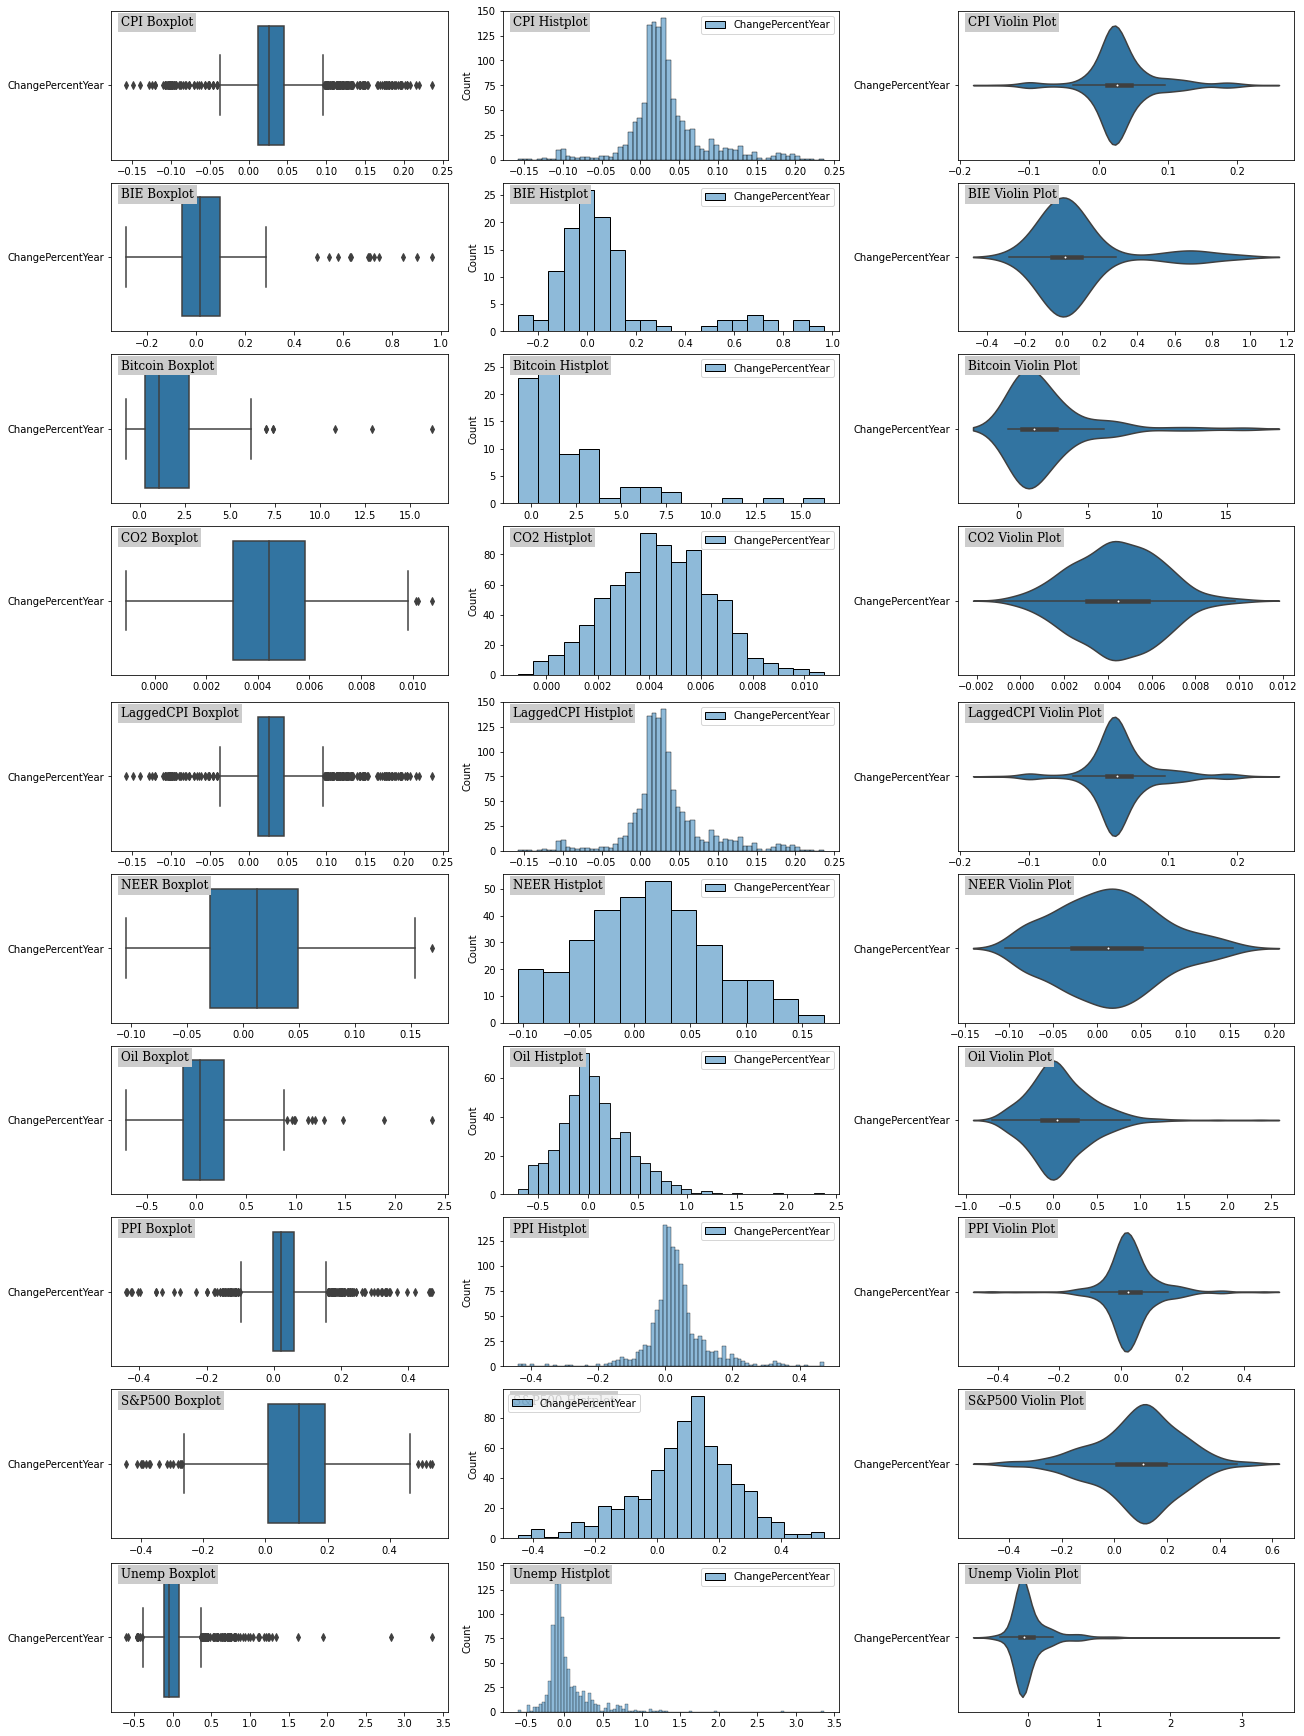

In [ ]:
# Draw the distributions of all variables in a subplot mosaic
f, axes = plt.subplot_mosaic([
                                ['CPI Boxplot', 'CPI Histplot', 'CPI Violin Plot'],
                                ['BIE Boxplot', 'BIE Histplot', 'BIE Violin Plot'],
                                ['Bitcoin Boxplot', 'Bitcoin Histplot', 'Bitcoin Violin Plot'],
                                ['CO2 Boxplot', 'CO2 Histplot', 'CO2 Violin Plot'],
                                ['LaggedCPI Boxplot', 'LaggedCPI Histplot', 'LaggedCPI Violin Plot'],
                                ['NEER Boxplot', 'NEER Histplot', 'NEER Violin Plot'],
                                ['Oil Boxplot', 'Oil Histplot', 'Oil Violin Plot'],
                                ['PPI Boxplot', 'PPI Histplot', 'PPI Violin Plot'],
                                ['S&P500 Boxplot', 'S&P500 Histplot', 'S&P500 Violin Plot'],
                                ['Unemp Boxplot', 'Unemp Histplot', 'Unemp Violin Plot']
                            ],
                            constrained_layout=True, figsize=(18,24))

# Label the subplots
for label, ax in axes.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, f.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.8', edgecolor='none', pad=3.0))

# Plot the boxplot, histplot, and violin plot for each of our datasets
sb.boxplot(data = cpi_data[['ChangePercentYear']], orient = "h", ax = axes['CPI Boxplot'])
sb.histplot(data = cpi_data[['ChangePercentYear']], ax = axes['CPI Histplot'])
sb.violinplot(data = cpi_data[['ChangePercentYear']], orient = "h", ax = axes['CPI Violin Plot'])
for dataset in dataset_list:
    sb.boxplot(data = dataset_list[dataset][['ChangePercentYear']], orient = "h", ax = axes[f'{dataset} Boxplot'])
    sb.histplot(data = dataset_list[dataset][['ChangePercentYear']], ax = axes[f'{dataset} Histplot'])
    sb.violinplot(data = dataset_list[dataset][['ChangePercentYear']], orient = "h", ax = axes[f'{dataset} Violin Plot'])
plt.show()

#### Conclusion from Analysing Distributions between Monthly Percentage Changes

As we can see from the above charts, all variables are centralised close to the 0% monthly change mark, with most of the mean values slightly on the positive side of 0.

From looking at the values of the percentage changes, we can see that CPI, LaggedCPI, NEER, BIE, unemployment, and PPI have a tight IQR of less than +-0.1. CO2 still has the tightest IQR of +-0.002. Bitcoin, S&P500, and oil prices continue to have the highest IQRs.

From looking at the shape and spread of the violin plots, CPI, LaggedCPI, PPI, and unemployment have narrow ranges; BIE, Bitcoin, S&P500, and oil have wider ranges, and both NEER and CO2 have the widest range.

Bringing together our knowledge of both the correlations and distributions, LaggedCPI, PPI and unemployment look to be the best variables to predict yearly percentage changes in CPI.

### Overall Conclusion from Data Visualisation

Based on correlation of values: LaggedCPI, CO2, Bitcoin, S&P500 and PPI look to be the best predictors of CPI.

Based on monthly percentage changes: LaggedCPI, PPI, unemployment rates, and oil prices look to be the best predictors of CPI.

Based on yearly percentage changes: LaggedCPI, PPI and unemployment rates look to be the best predictors of CPI.

From the three conclusions above, LaggedCPI and PPI look to be consistent good predictors of CPI through the different ways we have analysed the data.
- LaggedCPI: While we know the LaggedCPI one month before the actual CPI, it might not be that useful for CPI to be a predictor of itself one month later.
- PPI: PPI is a calculated variable that is announced monthly by the US Bureau of Labor Statistics at the same time as CPI. Hence, it would definitely be more helpful if we can make conclusions about using our other variables as predictors for CPI instead.

In our next few sections, we will be exploring the use of Machine Learning to see if we derive other interesting uni-variate or multi-variate conclusions regarding the use of our variables as a predictor for CPI.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=35c2a1cc-073a-42d5-823b-8d4c5535d63b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>